In [1]:
import squidward.gpc as gpc
import squidward.kernels as kernels
import squidward.gp_viz as gp_viz
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2D Classification

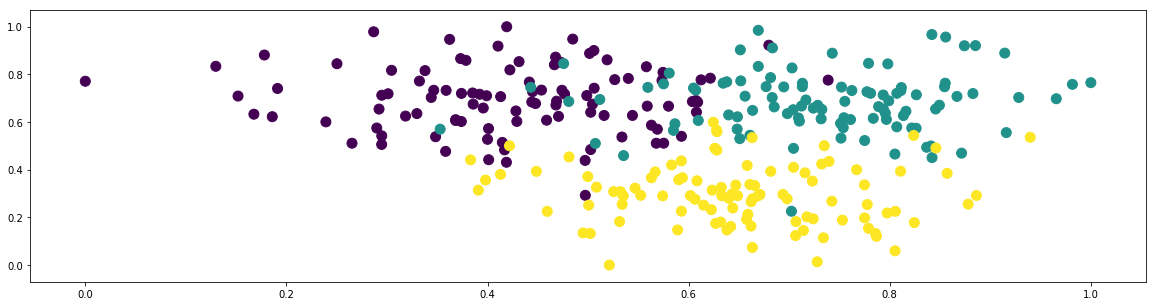

In [2]:
n = 100
cov = [[5,0],[0,5]]

x1 = np.random.multivariate_normal(mean=[2,10],cov=cov,size=n)
y1 = np.zeros(n)
x2 = np.random.multivariate_normal(mean=[8,10],cov=cov,size=n)
y2 = np.ones(n)
x3 = np.random.multivariate_normal(mean=[6,3],cov=cov,size=n)
y3 = np.ones(n)*2

x = np.concatenate([x1,x2,x3])
y = np.concatenate([y1,y2,y3]).reshape(-1,1)

X_std = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
x = X_std * (1.0 - 0.0) + 0.0

plt.figure(figsize=(20,5))
plt.scatter(x[:,0],x[:,1],c=y[:,0],s=100)
plt.show()

In [3]:
kernel = kernels.RBF(35**2,0.2)
model = gpc.GaussianProcess(kernel=kernel,var_l=1.0**2,inv_method='lu')
model.fit(x,y)
x_test = np.mgrid[0:1:0.05,0:1:0.05].reshape(2,-1).T
mean = model.posterior_predict(x_test)

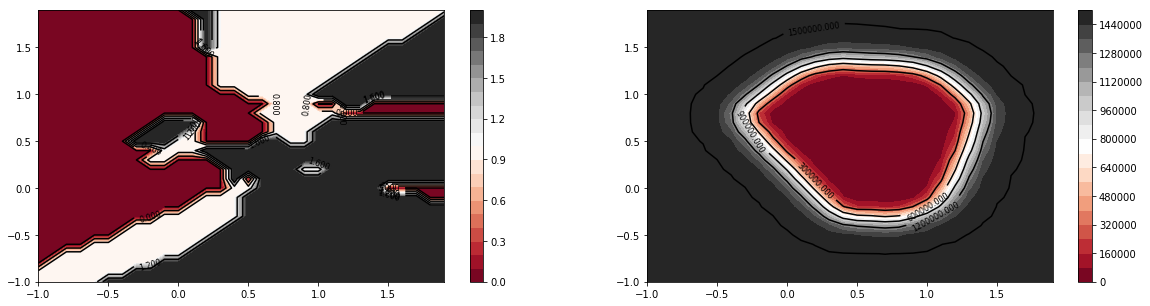

In [4]:
plt.figure(figsize=(20,5))
plt.subplot(121)
gp_viz.Classification.plot_contour(model,(-1,2,.1))
plt.subplot(122)
gp_viz.Classification.plot_contour(model,(-1,2,.1),True)
plt.show()